In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from tensorflow.keras.preprocessing.image import load_img

In [6]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [7]:
!unzip -q /content/gdrive/MyDrive/Colab/ML_ZoomCamp/data.zip

In [10]:
!ls data

test  train


## Sample img

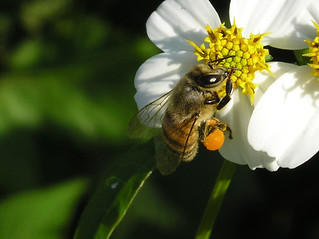

In [11]:
path = './data/train/bee'
name = '3466294_2f5bd421f8_n.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [12]:
img = load_img(fullname, target_size=(150, 150))

In [13]:
x = np.array(img)
x.shape

(150, 150, 3)

## Convolutional neural networks

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [64]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 3677 images belonging to 2 classes.


In [65]:
train_ds.class_indices

{'bee': 0, 'wasp': 1}

In [66]:
test_gen = ImageDataGenerator(rescale=1./255)

test_ds = test_gen.flow_from_directory(
    './data/test',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 918 images belonging to 2 classes.


In [67]:
def make_model(input_size=150, learning_rate=0.002):

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    conv = keras.layers.Conv2D(filters=32, kernel_size=(3,3),  activation='relu', input_shape=(input_size, input_size, 3))(inputs)
    pools = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv)
    vectors = keras.layers.Flatten()(pools)

    inner = keras.layers.Dense(units=64, activation='relu')(vectors)

    outputs = keras.layers.Dense(units=1, activation='sigmoid')(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy(from_logits=False)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [68]:
model = make_model(learning_rate=0.002)

In [69]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_18 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 175232)            0         
                                                                 
 dense_10 (Dense)            (None, 64)                11214912  
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                           

In [71]:
history = model.fit(train_ds,
                    epochs=10,
                    validation_data=test_ds)

Epoch 1/10
184/184 [==============================] - 93s 499ms/step - loss: 0.6719 - accuracy: 0.5749 - val_loss: 0.6283 - val_accuracy: 0.5926
Epoch 2/10
184/184 [==============================] - 108s 589ms/step - loss: 0.5963 - accuracy: 0.6872 - val_loss: 0.5573 - val_accuracy: 0.7146
Epoch 3/10
184/184 [==============================] - 102s 553ms/step - loss: 0.5530 - accuracy: 0.7182 - val_loss: 0.5491 - val_accuracy: 0.7004
Epoch 4/10
184/184 [==============================] - 94s 511ms/step - loss: 0.5128 - accuracy: 0.7509 - val_loss: 0.5336 - val_accuracy: 0.7222
Epoch 5/10
184/184 [==============================] - 99s 538ms/step - loss: 0.4865 - accuracy: 0.7762 - val_loss: 0.5080 - val_accuracy: 0.7647
Epoch 6/10
184/184 [==============================] - 96s 521ms/step - loss: 0.4594 - accuracy: 0.7930 - val_loss: 0.5375 - val_accuracy: 0.7309
Epoch 7/10
184/184 [==============================] - 93s 506ms/step - loss: 0.4319 - accuracy: 0.8110 - val_loss: 0.5119 - val_

In [83]:
# Median of training accuracy
np.median(history.history['accuracy'])

0.7846070230007172

In [82]:
# Standard deviation of training loss
np.std(history.history['loss'])

0.09423057972511494

In [84]:
train_gen_2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds_2 = train_gen_2.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 3677 images belonging to 2 classes.


In [85]:
history_2 = model.fit(train_ds_2,
                      epochs=10,
                      validation_data=test_ds)

Epoch 1/10
184/184 [==============================] - 116s 632ms/step - loss: 0.4953 - accuracy: 0.7653 - val_loss: 0.4668 - val_accuracy: 0.7778
Epoch 2/10
184/184 [==============================] - 138s 750ms/step - loss: 0.4922 - accuracy: 0.7718 - val_loss: 0.5218 - val_accuracy: 0.7560
Epoch 3/10
184/184 [==============================] - 115s 622ms/step - loss: 0.4946 - accuracy: 0.7661 - val_loss: 0.4746 - val_accuracy: 0.7800
Epoch 4/10
184/184 [==============================] - 114s 619ms/step - loss: 0.4729 - accuracy: 0.7784 - val_loss: 0.4917 - val_accuracy: 0.7745
Epoch 5/10
184/184 [==============================] - 115s 622ms/step - loss: 0.4690 - accuracy: 0.7827 - val_loss: 0.4623 - val_accuracy: 0.7734
Epoch 6/10
184/184 [==============================] - 115s 621ms/step - loss: 0.4653 - accuracy: 0.7854 - val_loss: 0.4686 - val_accuracy: 0.7843
Epoch 7/10
184/184 [==============================] - 112s 607ms/step - loss: 0.4677 - accuracy: 0.7895 - val_loss: 0.4991 -

In [87]:
# Mean of validation loss
np.mean(history_2.history['val_loss'])

0.4850447833538055

In [97]:
# Avg validation accuracy for epochs 6-10
np.mean(history_2.history['val_accuracy'][5:])

0.7777777671813965